In [1]:
import os

os.sys.path.insert(0, '../script')

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from webnlg import WebNLGCorpus, DATASETS_FILEPATHS
%matplotlib inline

pd.set_option('max_colwidth', 1000)

import seaborn as sns

In [3]:
# datasets
DATASETS_FILEPATHS.keys()

dict_keys(['dev', 'train', 'test_no_lex', 'test_unseen_with_lex', 'test_with_lex'])

# Dataset format

## Train dataset directory tree

<img src="../img/dataset_train_directory.jpg" />

### 1triples_Airport_train_challenge.xml

<img src="../img/dataset_format_example.jpg" />

## Test dataset is all in one file, testdata_no_lex.xml

<img src="../img/dataset_test_example.jpg" />

# Dataset Stats

In [4]:
# loads datasets

train_dev = WebNLGCorpus.load(dataset=['train', 'dev'])
test_no_lex = WebNLGCorpus.load(dataset='test_no_lex')
test_unseen_with_lex = WebNLGCorpus.load(dataset='test_unseen_with_lex')

datasets = [train_dev, test_no_lex, test_unseen_with_lex]

In [5]:
# generate some statistics

datasets_stats = pd.DataFrame({
    # number of entries
    'n_entries': [len(ds) for ds in datasets],
    # number of distinct triples
    'n_distinct_triples': [ds.mdf.mtext.nunique() for ds in datasets],
    # number of distinct generated texts - if test_no_lex, returns 0
    'n_distinct_lexes': [ds.ldf.ltext.nunique() if ds.dataset != 'test_no_lex' else 0 for ds in datasets],
    # number of triples -> each entry can have up to 7 triples
    'n_triples': [len(ds.mdf) for ds in datasets],
    # average text length
    'avg_lexes_length': [ds.ldf.ltext.str.len().mean() if ds.dataset != 'test_no_lex' else 0 for ds in datasets]
    }, index=[ds.dataset for ds in datasets])

datasets_stats

,avg_lexes_length,n_distinct_lexes,n_distinct_triples,n_entries,n_triples
train_dev,117.367354,20308,2131,7812,23021
test_no_lex,0.000000,0,2331,1862,5378
test_unseen_with_lex,110.532676,2430,1068,891,2450


## Is there any duplicated lexicalized text?

In [6]:
train_dev.ldf.ltext.value_counts().nlargest(5)

St Vincent-St Mary High School, Akron, Summit County, Ohio, United States is the ground of Akron Summit Assault.    3
Joe Biden is a United States leader.                                                                                3
Joe Biden is a leader of the United States.                                                                         3
Barack Obama is the leader of the United States.                                                                    3
The leader of Greece is Nikos Voutsis.                                                                              2
Name: ltext, dtype: int64

In [8]:
barack_obama_idx = train_dev.ldf[train_dev.ldf.ltext == 'Barack Obama is the leader of the United States.'].idx


for idx in barack_obama_idx:
    
    print(train_dev.sample(idx=idx))
    print('\n---\n')

Triple info: {'category': 'Building', 'eid': 'Id232', 'idx': '3_231', 'ntriples': 1}

	Modified triples:

United_States | leaderName | Barack_Obama


	Lexicalizations:

The leader of the United States was Barack Obama.
Barack Obama is the leader of the U.S.
Barack Obama is the leader of the United States.

---

Triple info: {'category': 'WrittenWork', 'eid': 'Id211', 'idx': '4_210', 'ntriples': 1}

	Modified triples:

United_States | leaderName | Barack_Obama


	Lexicalizations:

The leader of the United States is Barack Obama.
Barack Obama is the leader of the United States.
Barack Obama is the president of the US.

---

Triple info: {'category': 'Food', 'eid': 'Id267', 'idx': '5_266', 'ntriples': 1}

	Modified triples:

United_States | leaderName | Barack_Obama


	Lexicalizations:

Barack Obama is a leader of the United States.
Barack Obama is the leader of the United States.
Barack Obama is the leader of United States.

---



<img src="../img/barack_obama_food.jpg" />

Is Barack Obama a Food? I've sent an e-mail to Anastasia Shimorina.

<img src="../img/barack_obama_food_explanation.jpg" />

One example:

<img src="../img/barack_obama_food2.jpg" />

So, every 1 triple entry is also in some Xtriplesize_<category>, where X > 1 and <category> is the same category of X?!
    
This below tests only if every 1 triple entry is in some Xtriple set, X > 1, without caring with category

In [9]:
# triples from 1triple sets
triple_1_entries = train_dev.subset(ntriples=1).mdf

# triples from Xtriple sets, X > 1
triple_gt1_entries = train_dev.mdf[~train_dev.mdf.idx.isin(triple_1_entries.idx)]

In [10]:
# triples that are in 1triple sets bot not in Xtriple sets, X > 1
not_in_triple1 = triple_1_entries[~triple_1_entries.mtext.isin(triple_gt1_entries.mtext)]

not_in_triple1.head()

,idx,mtext,m_subject,m_predicate,m_object
58,0_58,"Al-Taqaddum_Air_Base | locationIdentifier | ""MAT""",Al-Taqaddum_Air_Base,locationIdentifier,"""MAT"""
104,0_104,Amsterdam_Airport_Schiphol | 1st_runway_LengthMetre | 3800,Amsterdam_Airport_Schiphol,1st_runway_LengthMetre,3800
105,0_105,Amsterdam_Airport_Schiphol | 1st_runway_SurfaceType | Asphalt,Amsterdam_Airport_Schiphol,1st_runway_SurfaceType,Asphalt
118,0_118,"Amsterdam_Airport_Schiphol | runwayName | ""09/27 'Buitenveldertbaan'""",Amsterdam_Airport_Schiphol,runwayName,"""09/27 'Buitenveldertbaan'"""
120,0_120,"Amsterdam_Airport_Schiphol | runwayName | ""18L/36R 'Aalsmeerbaan'""",Amsterdam_Airport_Schiphol,runwayName,"""18L/36R 'Aalsmeerbaan'"""


In [11]:
len(not_in_triple1)

312

In [12]:
train_dev.sample(idx='0_104')

Triple info: {'category': 'Airport', 'eid': 'Id105', 'idx': '0_104', 'ntriples': 1}

	Modified triples:

Amsterdam_Airport_Schiphol | 1st_runway_LengthMetre | 3800


	Lexicalizations:

The length of the first runway at Amsterdam Airport Schiphol is 3800 metres.
The length of the 1st runway at Amsterdam airport Schipol is 3800 metres.
The length of the first runway at Amsterdam Aiport Schiphol is 3800 meters.

So, there are triples in 1triple sets that aren't in some Xtriple set, X > 1.

And what about if all triples in Xtriple set are in 1triple set?

In [13]:
not_in_triplegt1 = triple_gt1_entries[~triple_gt1_entries.mtext.isin(triple_1_entries.mtext)]

not_in_triplegt1.head()

,idx,mtext,m_subject,m_predicate,m_object
1816,10_14,"Abilene_Regional_Airport | cityServed | Abilene,_Texas",Abilene_Regional_Airport,cityServed,"Abilene,_Texas"
1818,10_15,"Abilene_Regional_Airport | cityServed | Abilene,_Texas",Abilene_Regional_Airport,cityServed,"Abilene,_Texas"
1820,10_16,"Abilene_Regional_Airport | cityServed | Abilene,_Texas",Abilene_Regional_Airport,cityServed,"Abilene,_Texas"
1835,10_23,Madrid | country | Spain,Madrid,country,Spain
1853,10_32,"Adolfo_Suárez_Madrid–Barajas_Airport | location | ""Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas""",Adolfo_Suárez_Madrid–Barajas_Airport,location,"""Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas"""


In [14]:
len(not_in_triplegt1)

2128

In [15]:
train_dev.sample(idx='10_0')

Triple info: {'category': 'Airport', 'eid': 'Id1', 'idx': '10_0', 'ntriples': 2}

	Modified triples:

Aarhus | leaderName | Jacob_Bundsgaard
Aarhus_Airport | cityServed | Aarhus


	Lexicalizations:

Aarhus airport serves the city of Aarhus who's leader is Jacob Bundsgaard.
Aarhus airport serves the city of Aarhus where Jacob Bundsgaard is a leader.
Aarhus airport serves the city of Aarhus, it's leader is Jacob Bundsgaard.

## Distribution per category and number of triples

In [16]:
def heatmap_by_category_ntriples(ds):
    
    # makes a figure
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    # heatmap of counts per category x ntriples
    sns.heatmap(pd.crosstab(ds.category, ds.ntriples), 
                # annotate counts
                annot=True,
                ax=ax,
                # integer formatting
                fmt='d',
                cmap='Blues')

### train

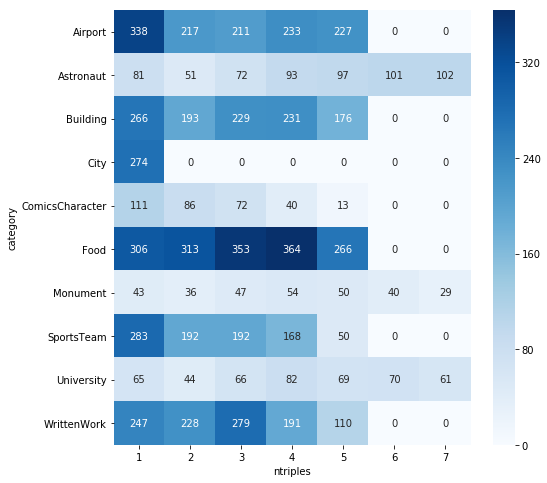

In [17]:
heatmap_by_category_ntriples(train_dev.edf)

### test_no_lex

there are categories on test that there aren't on train, like Artist

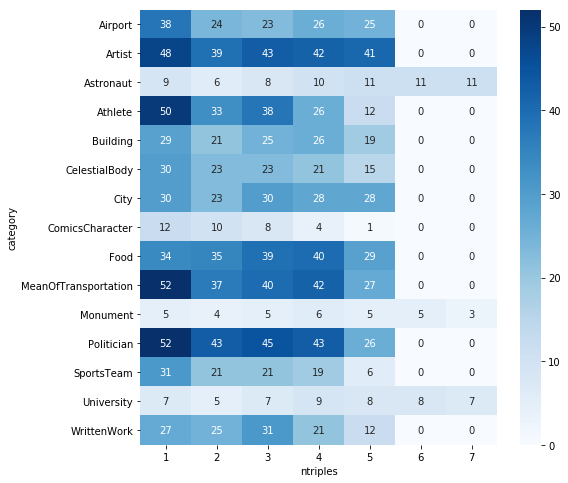

In [18]:
heatmap_by_category_ntriples(test_no_lex.edf)

### test_unseen_with_lex

unseen categories

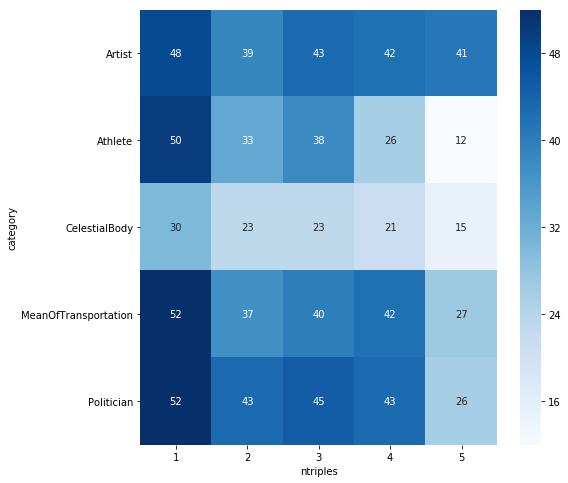

In [19]:
heatmap_by_category_ntriples(test_unseen_with_lex.edf)

# Have a look at a sample

In [20]:
train_dev.sample(category='Astronaut', ntriples=1, random_state=100)

Triple info: {'category': 'Astronaut', 'eid': 'Id12', 'idx': '7_11', 'ntriples': 1}

	Modified triples:

Alan_Shepard | birthDate | "1923-11-18"


	Lexicalizations:

Alan Shepard was born November 18th, 1923.
Alan Shepard was born on November 18, 1923.
Alan Shepard was born on Nov 18, 1923.
Alan Shepard was born on 1923-11-18.
Alan Shepard was born on the 18th of November 1923.

In [21]:
test_no_lex.sample(category='Astronaut', ntriples=1, random_state=100)

Triple info: {'category': 'Astronaut', 'eid': 'Id139', 'idx': '0_138', 'ntriples': 1}

	Modified triples:

Apollo_8 | backup pilot | Buzz_Aldrin


In [22]:
test_unseen_with_lex.sample(ntriples=1, random_state=100)

Triple info: {'category': 'Artist', 'eid': 'Id178', 'idx': '0_177', 'ntriples': 1}

	Modified triples:

Alison_O'Donnell | genre | Jazz


	Lexicalizations:

Alison O'Donnell plays jazz music.
Alison O'Donnell performs jazz music.

# Is there any duplicates?

## Is there any modified triple duplicated in a tripleset?

No

In [23]:
# count how many entries has duplicated mtriples among its mtriples
def n_duplicated_mtriples_per_entry(ds):
    
    mtriples_count_per_entry = ds.mdf.groupby(['idx', 'mtext']).size()
    
    return (mtriples_count_per_entry > 1).sum()

In [24]:
pd.Series({dataset.dataset: n_duplicated_mtriples_per_entry(dataset)
             for dataset in datasets},
          name='number of cases of triples duplicated in a tripleset')

test_no_lex             0
test_unseen_with_lex    0
train_dev               0
Name: number of cases of triples duplicated in a tripleset, dtype: int64

## Is there any modified triple duplicated among all entries?

yes

In [25]:
# counts, for each mtriple, in how many entries it occurs
def mtriples_count(ds):
    
    return ds.mdf.mtext.value_counts()

def mtriples_count_describe(ds):
    
    s = mtriples_count(ds).describe()
    s.name = ds.dataset
    
    return s

In [26]:
# ex: em média, cada triple no dataset train_dev está repetida 10.8 vezes
#     no máximo, 123 vezes
pd.concat([mtriples_count_describe(ds) for ds in datasets], axis=1)

,train_dev,test_no_lex,test_unseen_with_lex
count,2131.000000,2331.000000,1068.000000
mean,10.802909,2.307164,2.294007
std,13.211164,2.216992,1.641108
min,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000
50%,7.000000,2.000000,2.000000
75%,13.000000,3.000000,3.000000
max,123.000000,39.000000,10.000000


In [28]:
# most frequent triples in train dataset

cm_train = mtriples_count(train_dev)

cm_train.head(3)

English_language | spokenIn | Great_Britain    123
United_States | capital | Washington,_D.C.     105
United_States | language | English_language    102
Name: mtext, dtype: int64

## Are entries with shared triples lexicalized the same way?

Remember that the same triple can appear in entries with different size of tripleset.

There are some patterns...

In [29]:
# groups by mtext and lists the lexicalizations
def mtriples_with_generated_lexes(ds):
    
    # merges modified triple dataset and lexicalization dataset
    df = pd.merge(ds.mdf, ds.ldf)
    
    # groups by triple and for each triple generates a list of lexicalizations
    ddf = df.groupby('mtext').ltext.apply(list).to_frame()
    # adds a column with the number of lexicalizations
    ddf['size'] = ddf.ltext.apply(len)
    
    return ddf

# prints triple and its lexicalizations
def print_mtriple_with_generated_lexes(mtriple):
    
    print("triple: ", mtriple.name, '\n')
    for ltext in mtriple.ltext:
        print("lexicalization: ", ltext, '\n')

### train_dev

For example: 

* *11_Diagonal_Street | floorArea | 1200 (square metres)* appears in entries with eids 3_14(size = 1) and 29_14(size = 4)

In [30]:
mtriples_w_lexes_train = mtriples_with_generated_lexes(train_dev)

In [31]:
mtriples_w_lexes_train['size'].describe()

count    2131.000000
mean       28.432191
std        34.977128
min         1.000000
25%         6.000000
50%        17.000000
75%        36.000000
max       319.000000
Name: size, dtype: float64

In [32]:
mtriples_w_lexes_train_size_lt_5 = mtriples_w_lexes_train[mtriples_w_lexes_train['size'] < 5]

print_mtriple_with_generated_lexes(mtriples_w_lexes_train_size_lt_5.iloc[0, :])

triple:  11_Diagonal_Street | floorArea | 1200 (square metres) 

lexicalization:  11 Diagonal Street has a floor area of 1200 square metres. 

lexicalization:  The architect of 11 Diagonal Street is Helmut Jahn and it was completed in 1983. It has 20 floors and a floor area of 1200 square metres. 

lexicalization:  11 Diagonal Street was designed by Helmut Jahn and was completed in 1983. It has 20 floors and an area of 1200 square metres. 

lexicalization:  Helmut Jahn was the architect of 11 Diagonal Street which was completed in 1983 with 20 floors and a total floor area of 1200 square metres. 



In [33]:
print_mtriple_with_generated_lexes(mtriples_w_lexes_train_size_lt_5.iloc[1, :])

triple:  11_Diagonal_Street | location | Johannesburg 

lexicalization:  11 Diagonal Street is in Johannesburg. 

lexicalization:  11 Diagonal Street is located in Johannesburg. 



### test_with_lex

no, you mustn't see the test data

# And what about lexicalizations for same predicates?

In [34]:
# groups by m_predicate and lists the lexicalizations
def m_predicates_with_generated_lexes(ds):
    
    # merges modified triple dataset and lexicalization dataset
    df = pd.merge(ds.mdf, ds.ldf)
    
    # groups by triple and for each triple generates a list of lexicalizations
    ddf = df.groupby('m_predicate').ltext.apply(list).to_frame()
    # adds a column with the number of lexicalizations
    ddf['size'] = ddf.ltext.apply(len)
    
    return ddf

# prints triple and its lexicalizations
def print_m_predicate_with_generated_lexes(mtriple):
    
    print("m_predicate: ", mtriple.name, '\n')
    for ltext in mtriple.ltext:
        print("lexicalization: ", ltext, '\n')

In [35]:
m_predicates_w_lexes_train = m_predicates_with_generated_lexes(train_dev)

In [36]:
m_predicates_w_lexes_train['size'].describe()

count     246.000000
mean      246.296748
std       597.935924
min         1.000000
25%        20.000000
50%        67.000000
75%       219.500000
max      6345.000000
Name: size, dtype: float64

In [37]:
m_predicates_w_lexes_train_size_lt_5 = m_predicates_w_lexes_train[m_predicates_w_lexes_train['size'] < 10]

print_m_predicate_with_generated_lexes(m_predicates_w_lexes_train_size_lt_5.sample().iloc[0, :])

m_predicate:  outlookRanking 

lexicalization:  The outlook ranking for the Acharya Institute of Technology is 63. 

lexicalization:  Acharya Institute of Technology's outlook ranking is 63. 

lexicalization:  Acharya Institute of Technology has an outlook ranking of 63. 

lexicalization:  The Acharya Institute of Technology has the official school colours of blue, white and orange and has the Outlook Ranking of 63. 

lexicalization:  Acharya Institute of Technology's ranking is 63 and its school colors are Blue, White and Orange. 

lexicalization:  The outlook ranking of the Acharya Institute of Technology is 63, and the official school colours are blue, white and orange. 



## Number of distinct subjects, predicates, objects

### for each dataset

In [38]:
def report_n_distinct_s_p_o(mdf):
    
    return {'subject': mdf.m_subject.nunique(),
            'predicate': mdf.m_predicate.nunique(),
            'object': mdf.m_object.nunique(),
            # defined as a subject ou object
            'subject_and_object': pd.concat([mdf.m_subject, mdf.m_object]).nunique(),
            # vocabulary size
            'vocabulary': pd.concat([mdf.m_subject, mdf.m_object, mdf.m_predicate]).nunique()
           }

In [39]:
df = pd.DataFrame(data = [report_n_distinct_s_p_o(ds.mdf) for ds in datasets],
             index = [ds.dataset for ds in datasets])

df['unique_triples'] = [ds.mdf.mtext.nunique() for ds in datasets]
df

,object,predicate,subject,subject_and_object,vocabulary,unique_triples
train_dev,1642,246,434,1771,2017,2131
test_no_lex,1888,300,575,2125,2425,2331
test_unseen_with_lex,898,159,238,1002,1161,1068


### among all datasets

In [40]:
pd.DataFrame(report_n_distinct_s_p_o(pd.concat([ds.mdf for ds in datasets])),
             index=['all'])

,object,predicate,subject,subject_and_object,vocabulary
all,2505,354,667,2730,3084


## Most frequent subjects, predicates, objects

In [41]:
def most_frequent(ds, type_, n=5):
    
    if type_ == 'subject':
        return ds.mdf.m_subject.value_counts().nlargest(n)
    if type_ == 'object':
        return ds.mdf.m_object.value_counts().nlargest(n)
    if type_ == 'predicate':
        return ds.mdf.m_predicate.value_counts().nlargest(n)

### train_dev

In [42]:
most_frequent(train_dev, 'subject')

United_States                      760
Acharya_Institute_of_Technology    539
Alan_Shepard                       478
Elliot_See                         474
Alan_Bean                          410
Name: m_subject, dtype: int64

In [43]:
most_frequent(train_dev, 'object')

United_States       944
English_language    294
Indonesia           185
Spain               169
Italy               142
Name: m_object, dtype: int64

In [44]:
most_frequent(train_dev, 'predicate')

country       2409
location      1537
leaderName    1385
ingredient     738
isPartOf       641
Name: m_predicate, dtype: int64

# Is tripleset connected?

is there a path between any pair of triples?

## Let's check a sample

### non connected example

This example looks like a case of verbalization containing more information than data!

Triple info: {'category': 'Food', 'eid': 'Id186', 'idx': '25_185', 'ntriples': 4}

	Modified triples:

Batagor | country | Indonesia
Siomay | dishVariation | Shumai
Shumai | dishVariation | Siomay
Batagor | ingredient | Peanut_sauce


	Lexicalizations:

Batagor comes from Indonesia, it includes peanut sauce and is a variation on Shumai/Siomay.
Shumai is a variation of Siomay and they are both types of the same dish. Batagor is found in Indonesia and has peanut sauce as an ingredient.
Batagor, a variant of Shumai and Siomay, contains peanut sauce and originates from Indonesia.


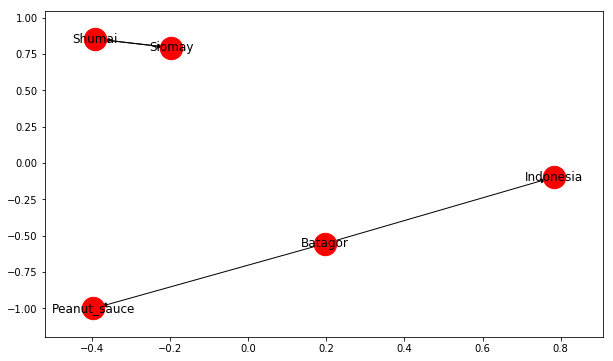

In [47]:
s = train_dev.sample(idx='25_185')

print(s)
s.draw_graph()

### connected example

Triple info: {'category': 'Food', 'eid': 'Id101', 'idx': '25_100', 'ntriples': 4}

	Modified triples:

Bacon_sandwich | dishVariation | BLT
BLT | dishVariation | Club_sandwich
Bacon_sandwich | ingredient | Condiment
Bacon_sandwich | country | United_Kingdom


	Lexicalizations:

The country that bacon sandwich comes from is the United Kingdom. It can be served with condiments and variations include the BLT and club sandwich.
Bacon sandwich is a dish from the United Kingdom and condiments are used to prepare it.BLT is a variation of a Club Sandwich.
The BLT is a bacon sandwich, a variant of the Club sandwich. The bacon sandwich uses condiments and originates from the United Kingdom.


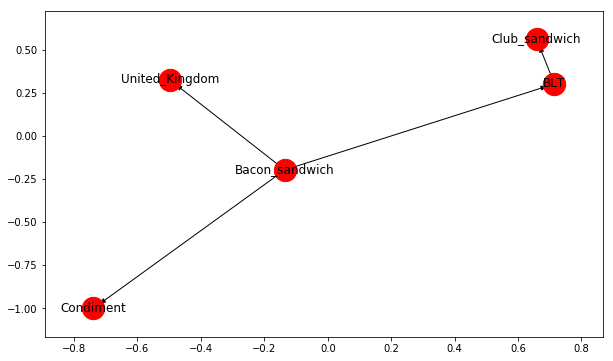

In [48]:
s = train_dev.sample(idx='25_100')

print(s)
s.draw_graph()

## Let's check all tripleset

In [51]:
import networkx as nx

def entries_is_connected_df(mdf):

    is_connected = []

    for idx, entry_group in mdf.groupby('idx'):

        entry_group.reset_index(inplace=True)

        d_g = nx.from_pandas_edgelist(entry_group, 'm_subject', 'm_object', 'm_predicate', create_using=nx.DiGraph())
        u_g = nx.Graph(d_g)

        is_connected.append([idx, nx.is_connected(u_g)])

    is_connected_df = pd.DataFrame(is_connected, columns=['idx', 'is_connected'])
    
    return is_connected_df.is_connected.value_counts()

### train_dev

In [52]:
entries_is_connected_df(train_dev.mdf)

True     7800
False      12
Name: is_connected, dtype: int64

### test_unseen_with_lex

In [53]:
entries_is_connected_df(test_unseen_with_lex.mdf)

True     887
False      4
Name: is_connected, dtype: int64

# Is it possible to determine a 'root' entity?

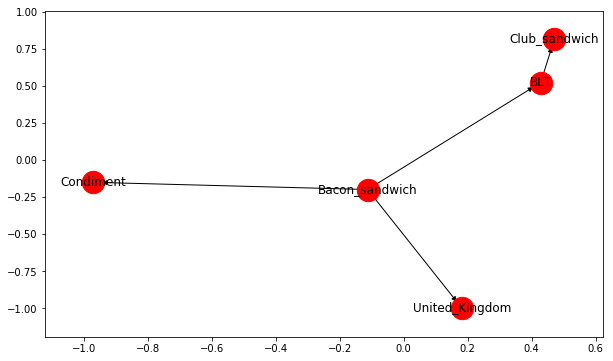

In [54]:
entry = train_dev.sample(idx='25_100')
entry.draw_graph()

In [55]:
sorted(entry.graph.degree, key=lambda x: x[1], reverse=True)

[('Bacon_sandwich', 3),
 ('BLT', 2),
 ('Club_sandwich', 1),
 ('Condiment', 1),
 ('United_Kingdom', 1)]

# Typos

"Afonso Pena International Airport ICAO Location **Idenitifier** is SBCT."

rather than

"Afonso Pena International Airport ICAO Location **Identifier** is SBCT."

In [56]:
test_with_lex = WebNLGCorpus.load(dataset='test_with_lex')

In [57]:
e = test_with_lex.sample(idx='0_3')
e

Triple info: {'category': 'Airport', 'eid': 'Id4', 'idx': '0_3', 'ntriples': 1}

	Modified triples:

Afonso_Pena_International_Airport | ICAO_Location_Identifier | "SBCT"


	Lexicalizations:

Afonso Pena International Airport ICAO Location Idenitifier is SBCT.
SBCT is the ICAO location identifier of Afonso Pena International Airport.

In [58]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

s_multiwordexpressions = test_with_lex.mdf.m_subject.str.lower().str.replace('_', ' ').str.split().tolist()
o_multiwordexpressions = test_with_lex.mdf.m_object.str.lower().str.replace('_', ' ').str.split().tolist()

all_multiwordexpressions = s_multiwordexpressions + o_multiwordexpressions
all_multiwordexpressions = list(set([tuple(s) for s in all_multiwordexpressions]))

from nltk.tokenize.mwe import MWETokenizer

t = MWETokenizer(all_multiwordexpressions)

from textacy.preprocess import preprocess_text

def preprocess(ref):
    
    ref = preprocess_text(ref, no_accents=True, lowercase=True, no_punct=True)
    
    return t.tokenize(ref.split())

cc = SmoothingFunction()
def bleu(e, text):
    
    references = [preprocess(ref) for ref in e.ldf.ltext.tolist()]

    # TODO: same smoothing as Moses?
    return sentence_bleu(references, preprocess(text), smoothing_function=cc.method3)

In [59]:
bleu(e, 'Afonso Pena International Airport ICAO Location Identifier is SBCT.')

0.5081327481546147

In [60]:
bleu(e, 'Afonso Pena International Airport ICAO Location Idenitifier is SBCT.')

1.0